In [1]:
import numpy as np
import pandas as pd #importing a module, dependency. example of abstraction

import matplotlib.pyplot as plt


/var/folders/fv/3yl7kz_13sjfcjlh2s051yqw0000gn/T/ipykernel_9001/3879263515.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd #importing a module, dependency. example of abstraction


In [2]:
! pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [7]:
titanic_df = pd.read_csv("titanic_test_data.csv")
titanic_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
titanic_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic_df.describe()
#

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
titanic_df["Embarked"].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [8]:
titanic_df["embarked_new"]=np.where(titanic_df["Embarked"]=="C","Cherbourg",
                                    np.where(titanic_df["Embarked"]=="Q","Queensland",
                                             "Southampton"))

In [9]:
titanic_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_new
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Queensland
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Southampton
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Queensland
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Southampton
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Southampton


In [10]:
titanic_df["mr_mrs"] = np.where(titanic_df["Name"].str.contains("Mrs."),"Mrs",
                                np.where(titanic_df["Name"].str.contains("Ms."),"Ms","Mr"))
# it might not be accurate (in fact it isnt) to assume everyone who doesnt
# have Mrs or Ms in their name is a Mr.

In [11]:
titanic_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_new,mr_mrs
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Queensland,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Southampton,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Queensland,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Southampton,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Southampton,Mrs


In [12]:
titanic_df['mr_mrs'].value_counts()

mr_mrs
Mr     345
Mrs     72
Ms       1
Name: count, dtype: int64

In [13]:
titanic_df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

# Basic Plots

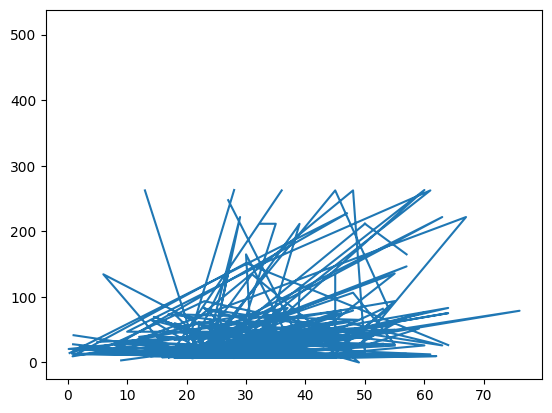

In [14]:
# (x-axis, y-axis)
plt.plot(titanic_df['Age'],titanic_df['Fare'])

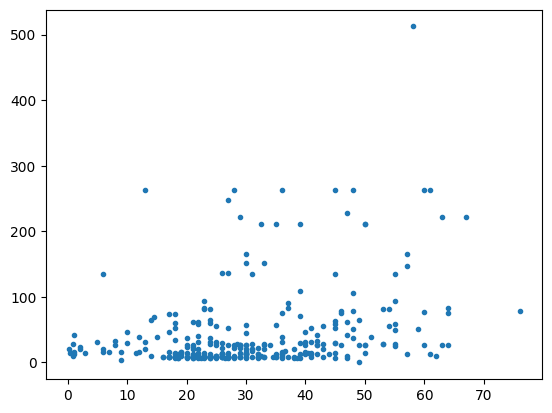

In [15]:
plt.plot(titanic_df['Age'],titanic_df['Fare'],'.')

# Histograms

(array([ 46.,   0.,   0.,   0.,   0., 270.,   0.,   0.,   0., 102.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

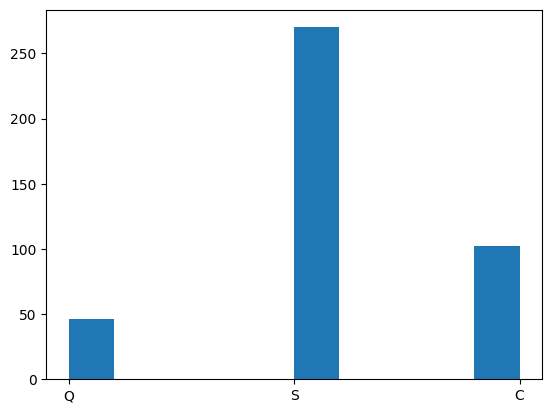

In [16]:
# only plotting one column. Shows you how many of a particular event occurred
plt.hist(titanic_df['Embarked'])

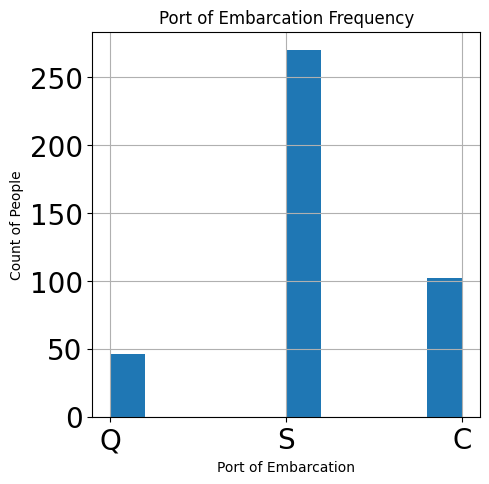

In [20]:
plt.figure(figsize = [5,5])
plt.hist(titanic_df['Embarked'])
plt.xlabel("Port of Embarcation")
plt.ylabel("Count of People")
plt.title("Port of Embarcation Frequency")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid()

# Pie Chart

In [22]:
agg_gender = titanic_df.groupby('Sex').count()
agg_gender

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_new,mr_mrs
Sex,,,,,,,,,,,,
female,152,152,152,127,152,152,152,152,44,152,152,152
male,266,266,266,205,266,266,266,265,47,266,266,266


<Axes: ylabel='PassengerId'>

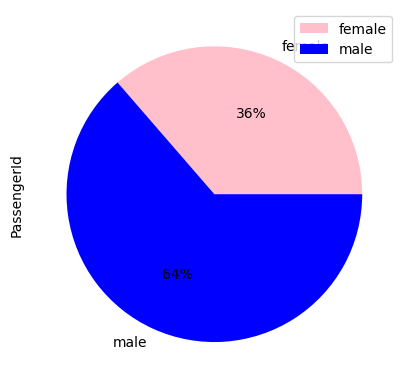

In [26]:
colors = ['pink','blue']
agg_gender.plot(kind='pie',y='PassengerId',autopct = '%1.0f%%', colors =colors)